首先读取数据

In [7]:
import pickle
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
plt.rcParams['font.family'] = ['Simhei']  # 中文显示

设置相应的超参数

In [8]:
d1,d2=2500,2500
w1,w2=40,40


window_size = 100  # 窗口大小,导致线平缓度
poly_order = 4    # 多项式阶数

In [9]:

#由你的电脑的屏幕大小来决定
screen_width,screen_height=2560,1600

#print(screen_wide,screen_high  )

def read_data(d1,d2,w1,w2):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas

mouse_move=read_data(d1,d2,w1,w2)

In [10]:
T=[]
X=[]
Y=[]
for k in range(len(mouse_move)):
    t=[]
    x=[]
    y=[]
    for i in range(len(mouse_move[k])):
        #print(mouse_move[0][i])
        t.append(mouse_move[k][i][0]-mouse_move[k][0][0])
        x.append(mouse_move[k][i][1])
        y.append(mouse_move[k][i][2])   
    T.append(t)
    X.append(x)
    Y.append(y)

In [11]:

S=[]

for i in range(len(T)):
    l=0
    s=[0,]#点在轨迹上的位置
    for j in range(1,len(T[i])):
        l+=np.sqrt((X[i][j]-X[i][j-1])**2+(Y[i][j]-Y[i][j-1])**2)
        s.append(l)
    S.append(s)



In [12]:
T_all=[]
S_all=[]

for i in range(len(T)):
    T_all.append(T[i][-1])
    S_all.append(S[i][-1])
print(T_all)
print(S_all)

t0=[]
t1=[]
T_less=[]

for i in range(len(T)):
    for j in range(len(T[i])):
        if S[i][j]!=S[i][j+1]:
            t0.append(T[i][j])
            break
    for j in range(len(T[i])):
        if S[i][-j]!=S[i][1-j]:
            t1.append(T[i][-j])
            break
    T_less.append(t1[i]-t0[i])

print(t0)
print(t1)
print(T_less)


[0.45847654342651367, 0.3897061347961426, 0.4146387577056885, 0.45227622985839844, 0.5568282604217529, 0.4432222843170166, 0.4751455783843994, 0.477161169052124, 0.5069928169250488, 0.45417070388793945, 0.5183937549591064, 0.5491867065429688, 0.48543882369995117, 0.47028398513793945, 0.3719916343688965, 0.43108701705932617, 0.42230653762817383, 0.4364888668060303, 0.37739133834838867, 0.4126107692718506, 0.405026912689209, 0.397247314453125, 0.4075958728790283, 0.4367380142211914, 0.4621589183807373, 0.4178135395050049, 0.4074745178222656, 0.4230315685272217, 0.4229891300201416, 0.4369049072265625, 0.39169812202453613, 0.4165647029876709, 0.4441075325012207, 0.3944544792175293, 0.4552030563354492, 0.5780344009399414, 0.47649240493774414, 0.5188643932342529, 0.4267539978027344, 0.41486549377441406, 0.3977017402648926, 0.39649391174316406, 0.3893604278564453, 0.3300189971923828, 0.44637060165405273, 0.4701497554779053, 0.42461347579956055, 0.47353672981262207, 0.5059983730316162, 0.48443

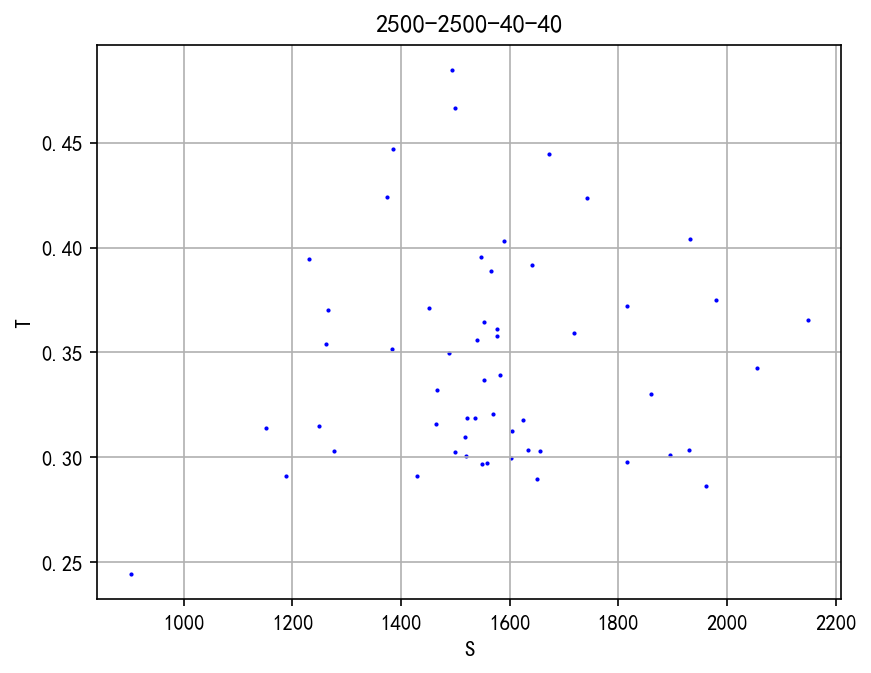

In [13]:
plt.figure(dpi=150)
plt.scatter(S_all,T_less, c='b', label='L', s=1)
#plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
plt.xlabel('S')
plt.ylabel('T')
#plt.legend()
plt.grid()
plt.show()

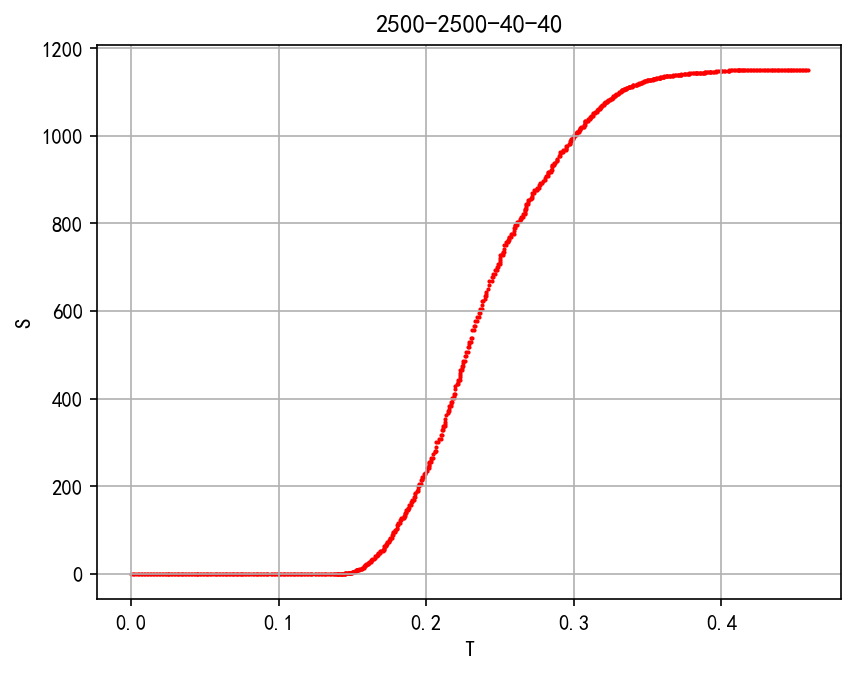

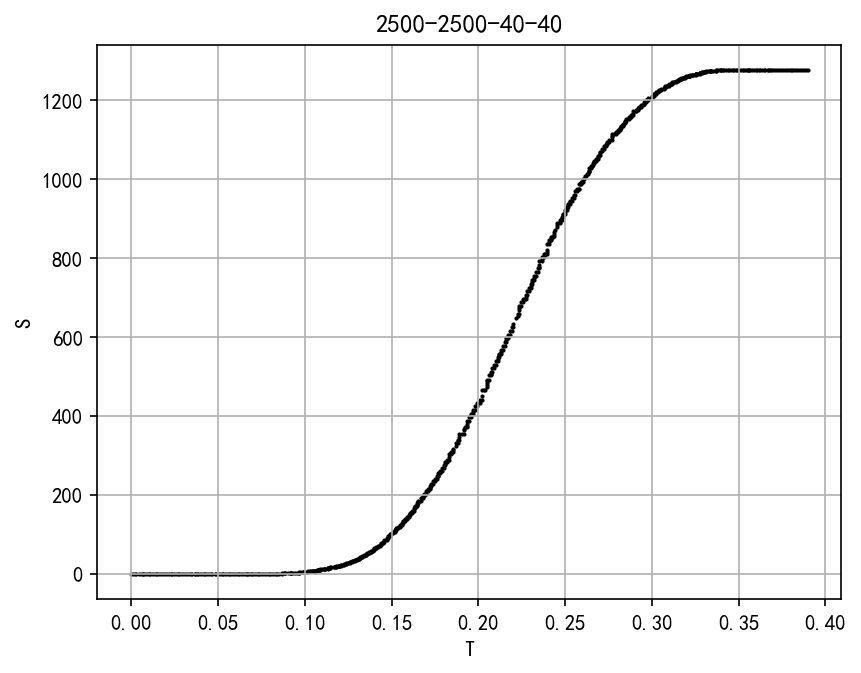

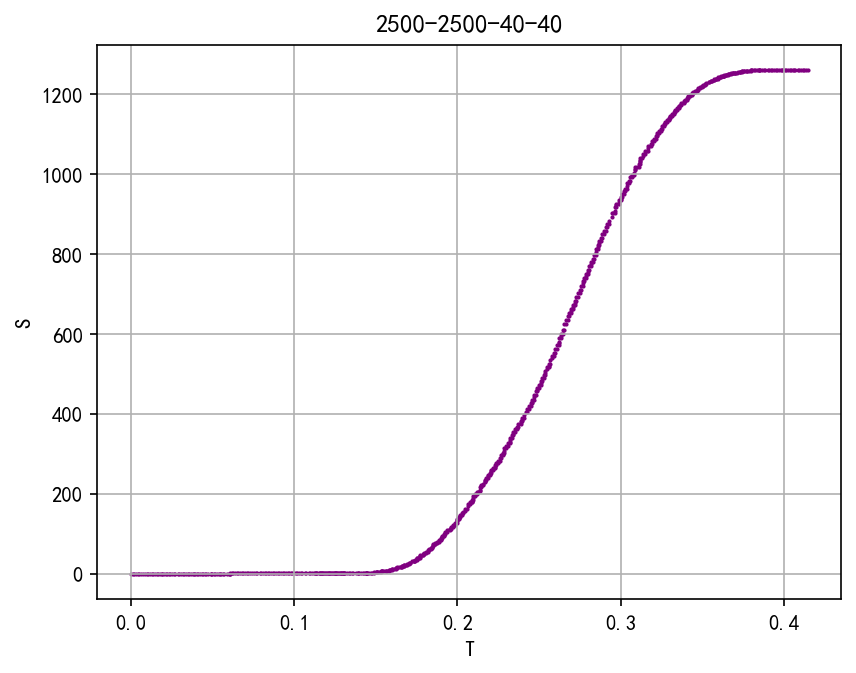

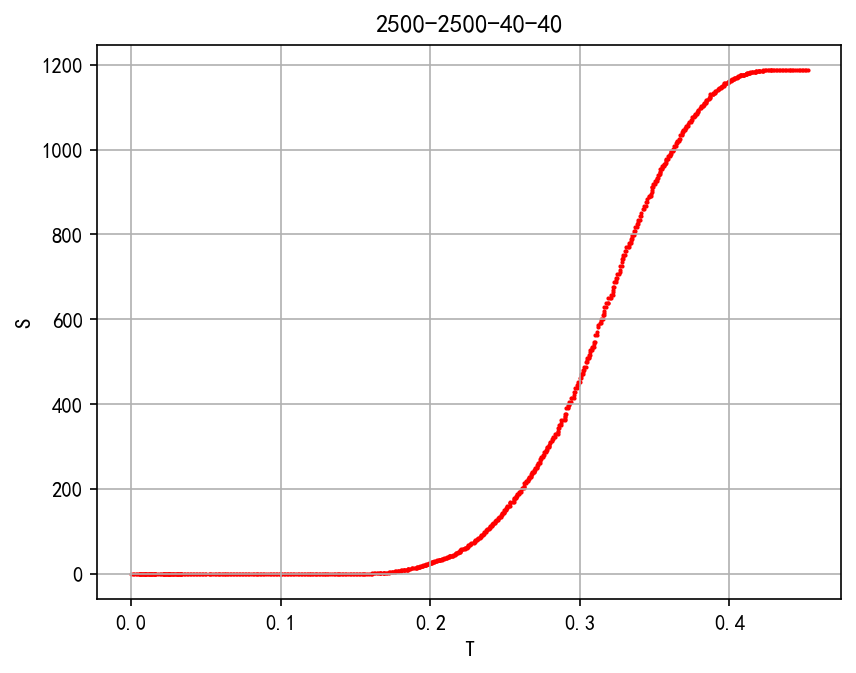

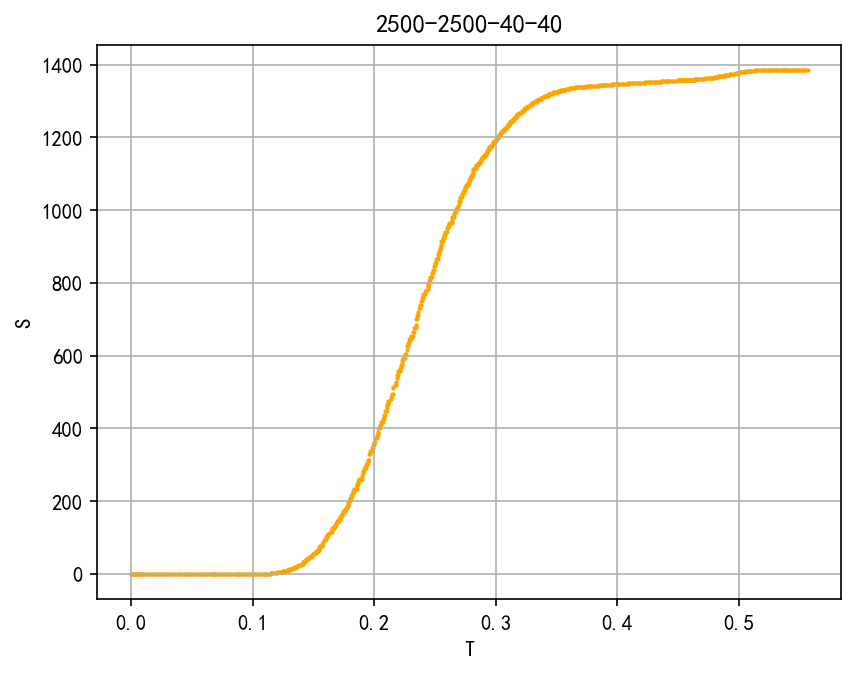

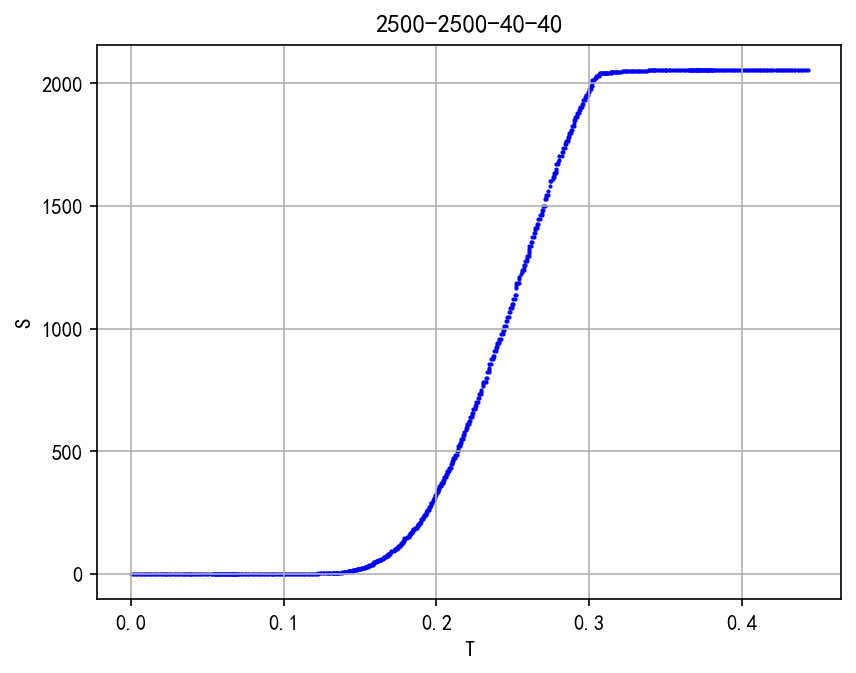

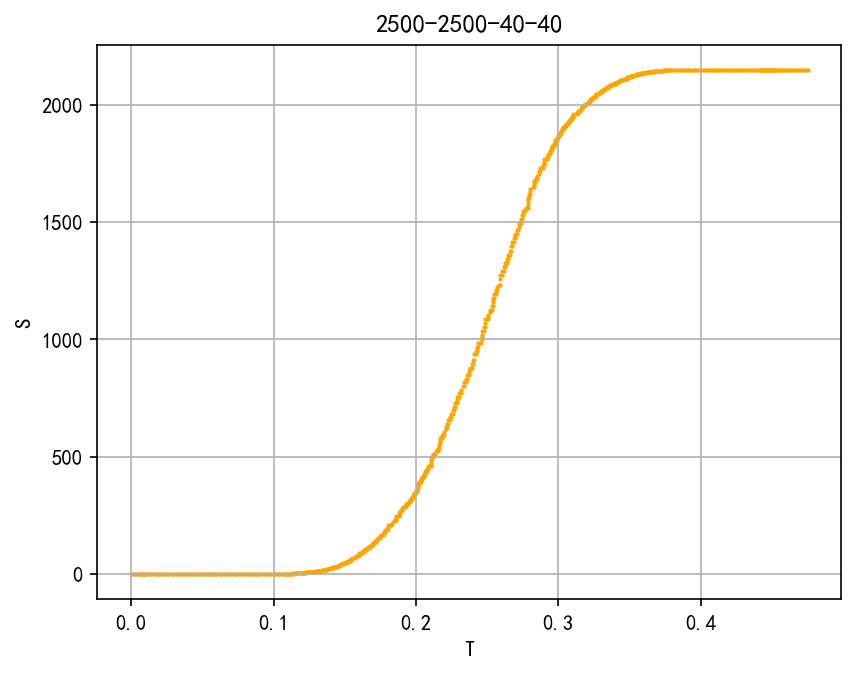

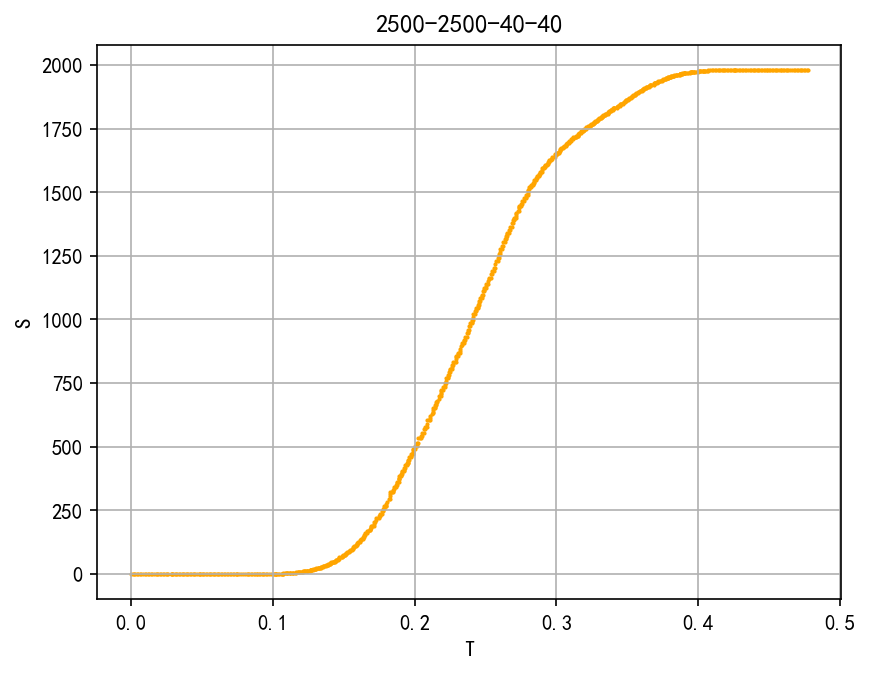

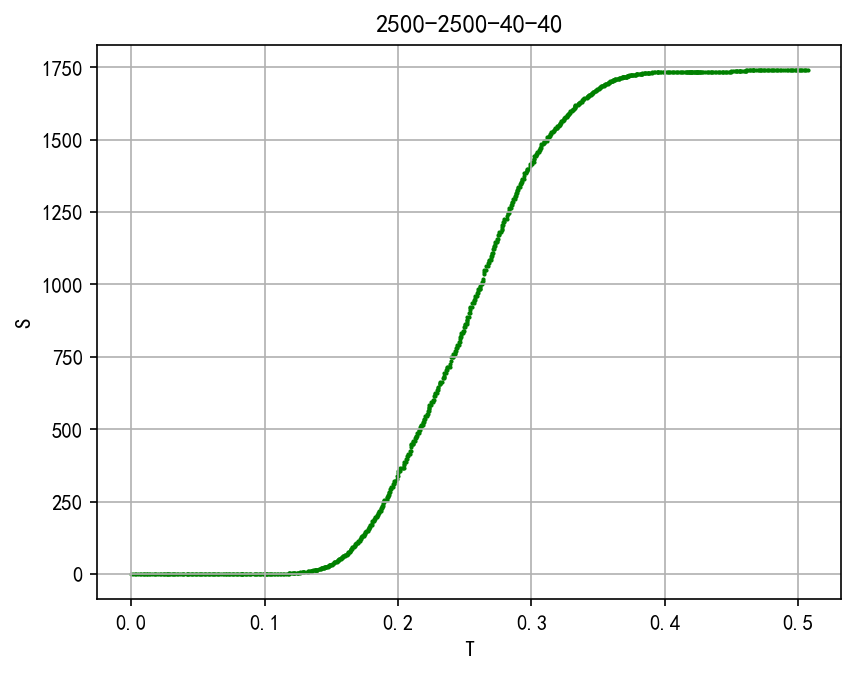

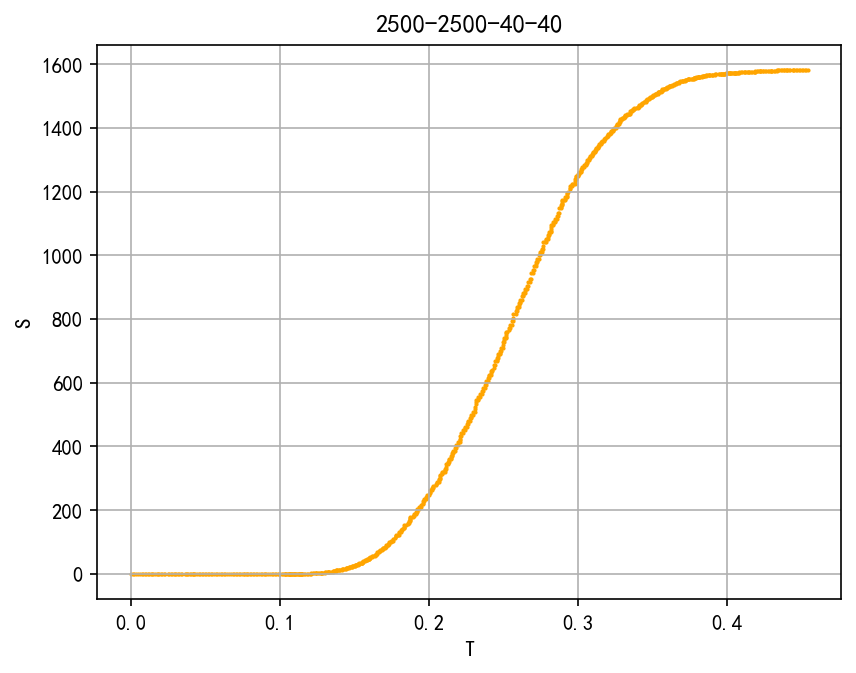

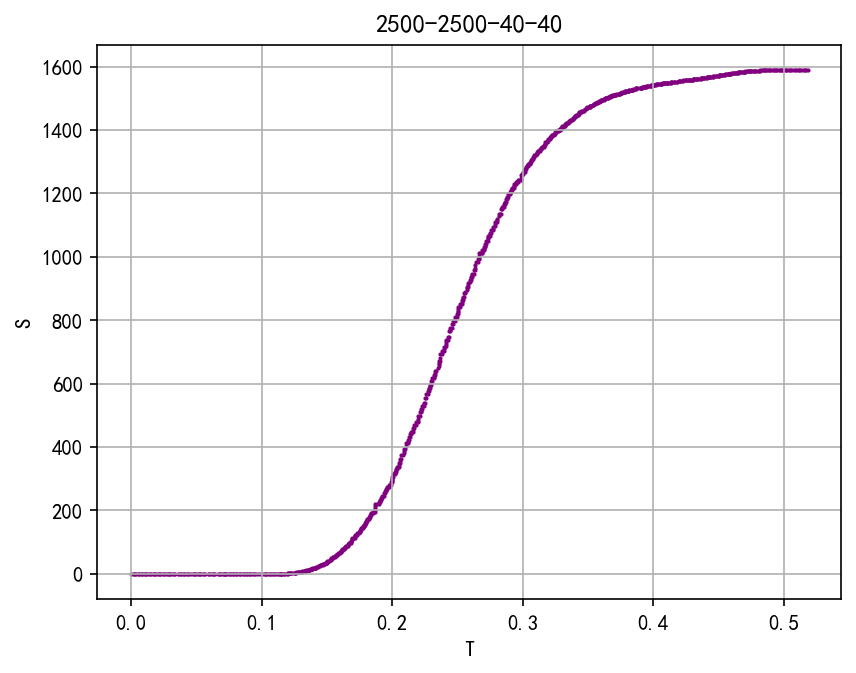

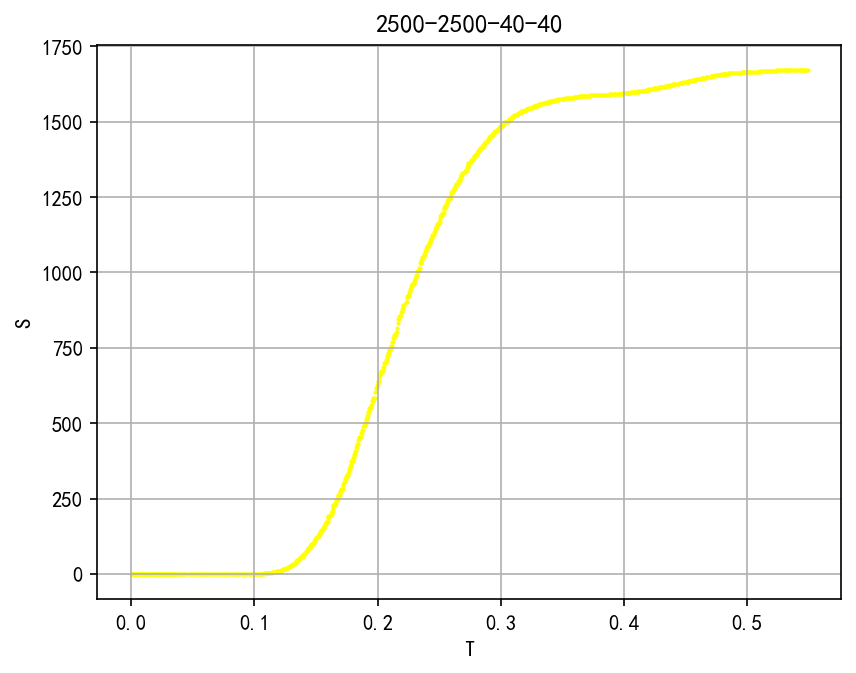

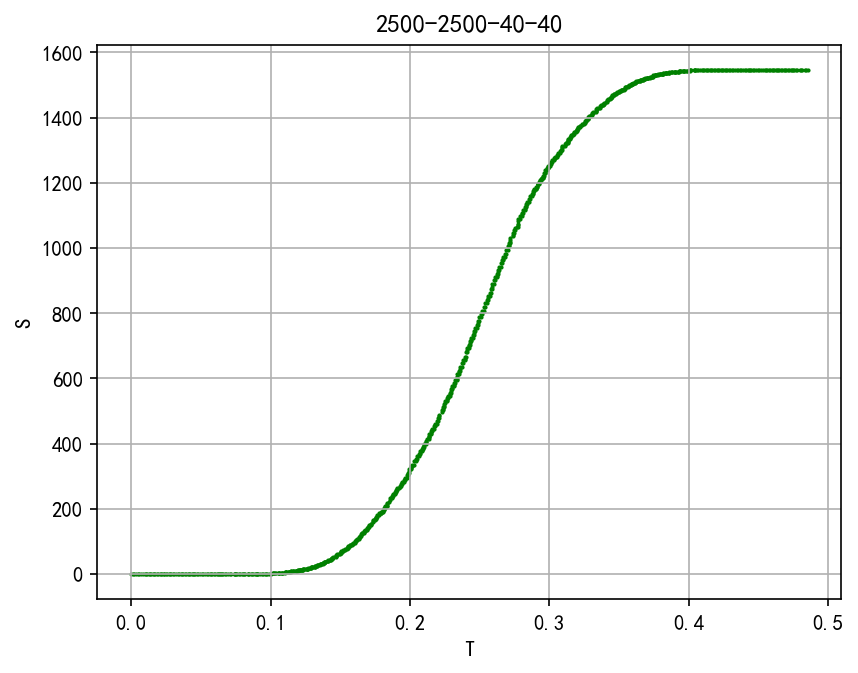

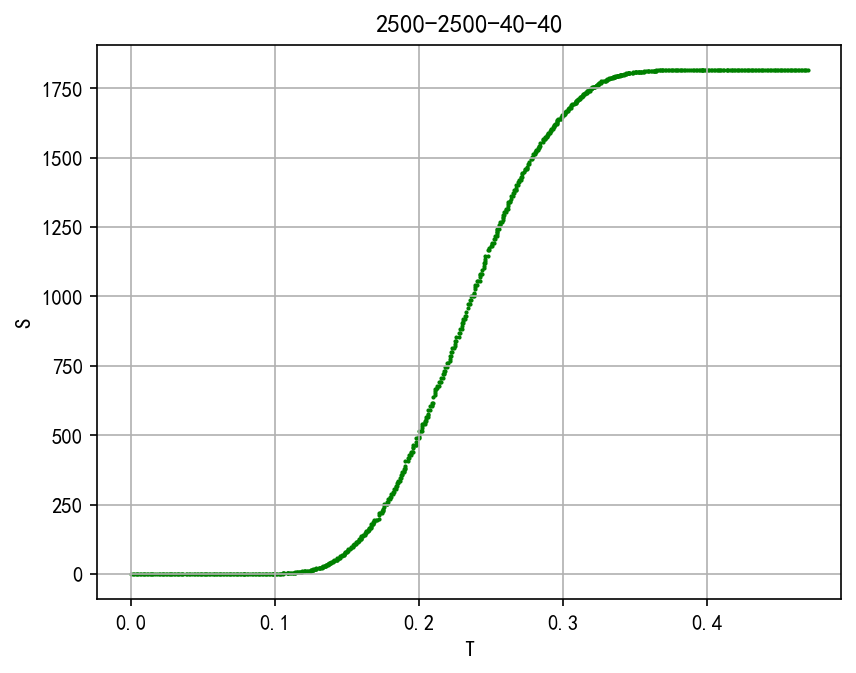

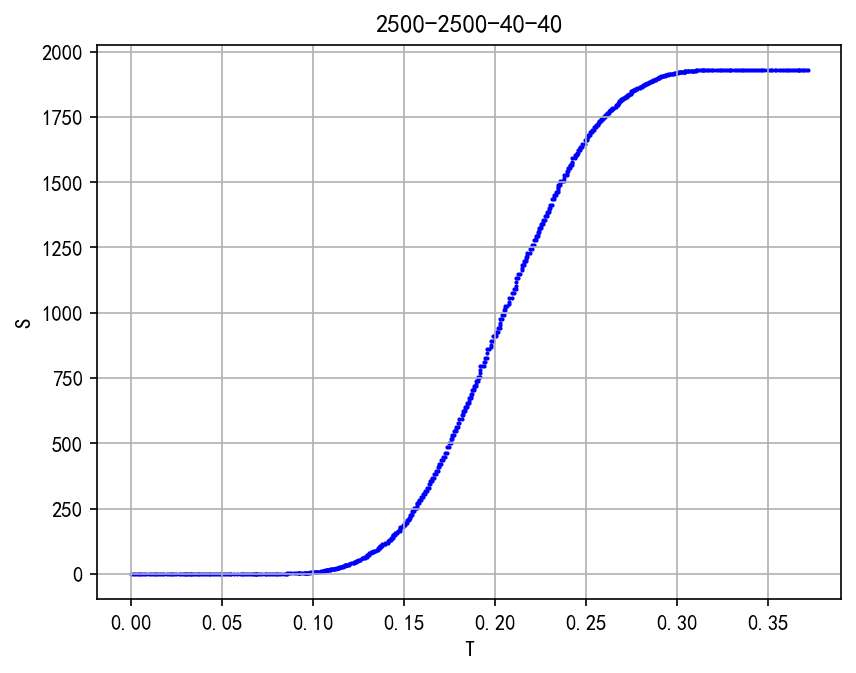

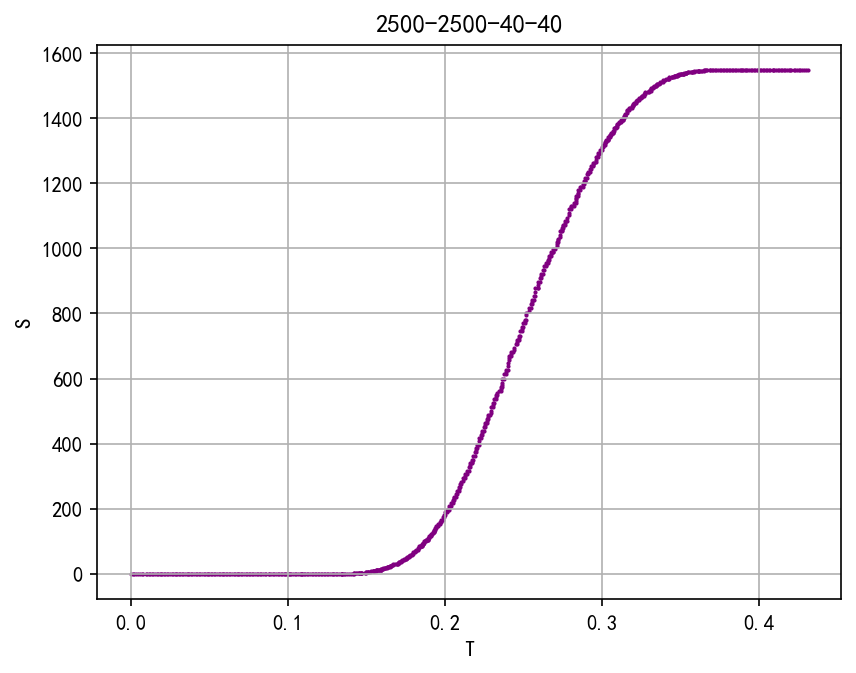

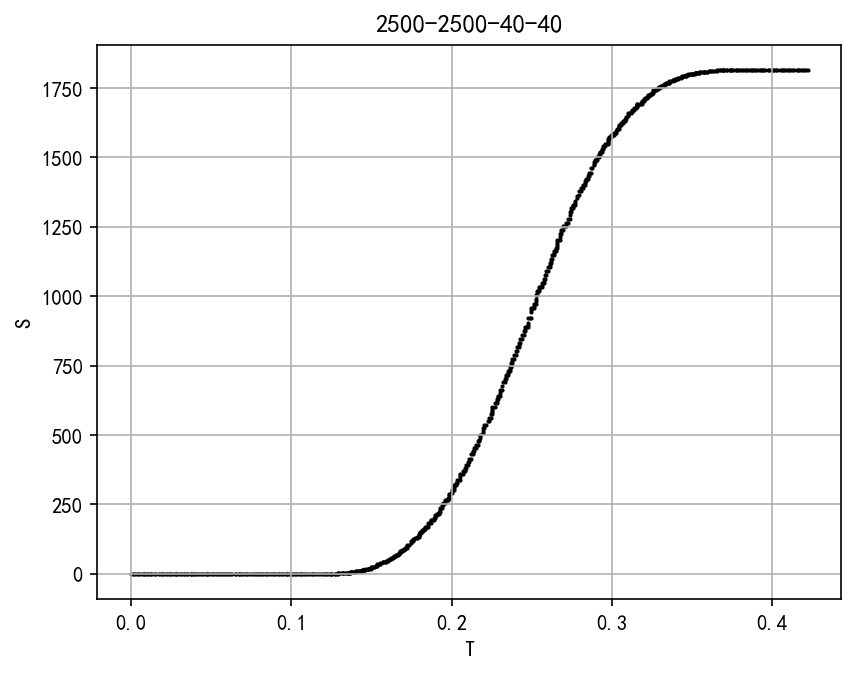

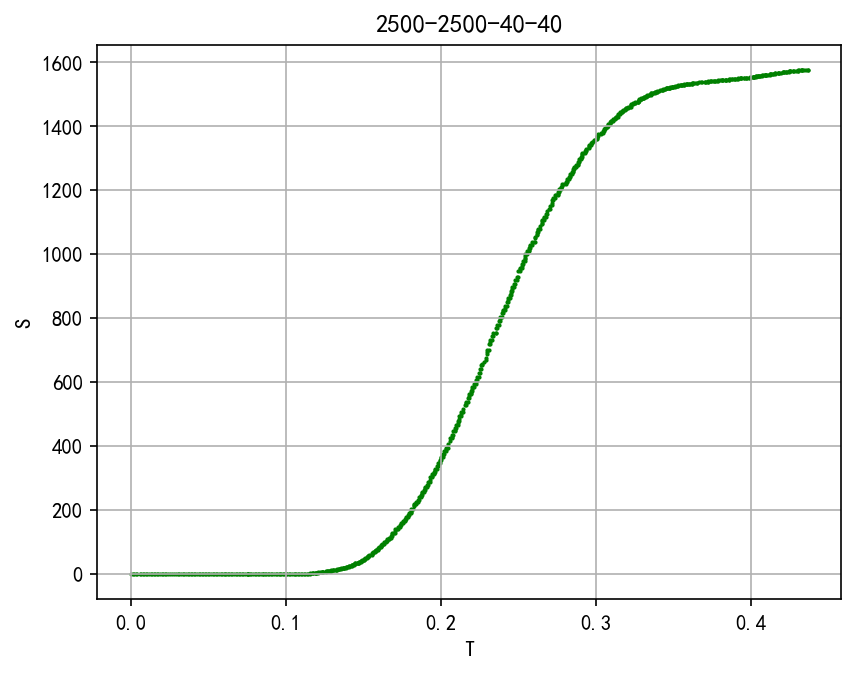

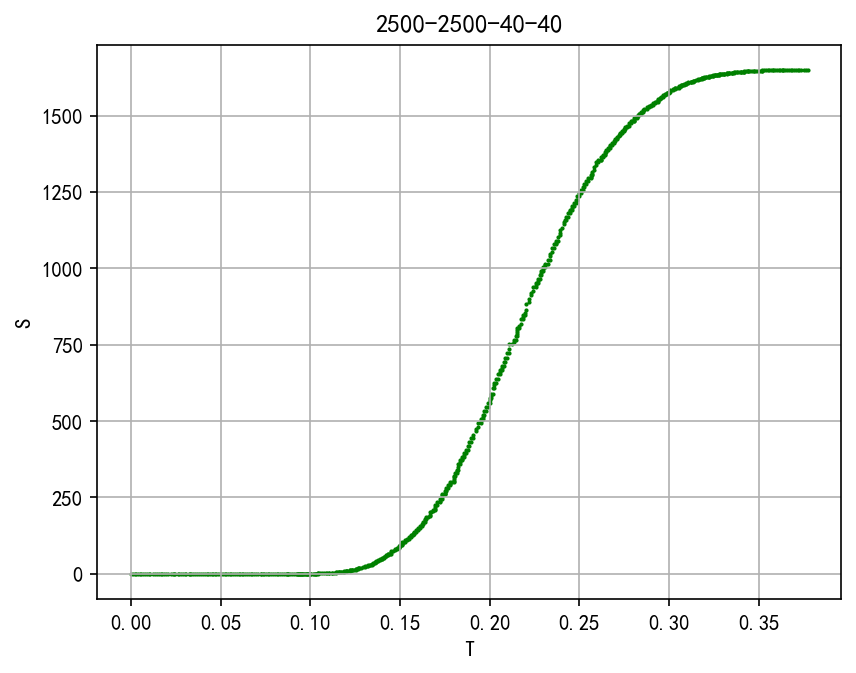

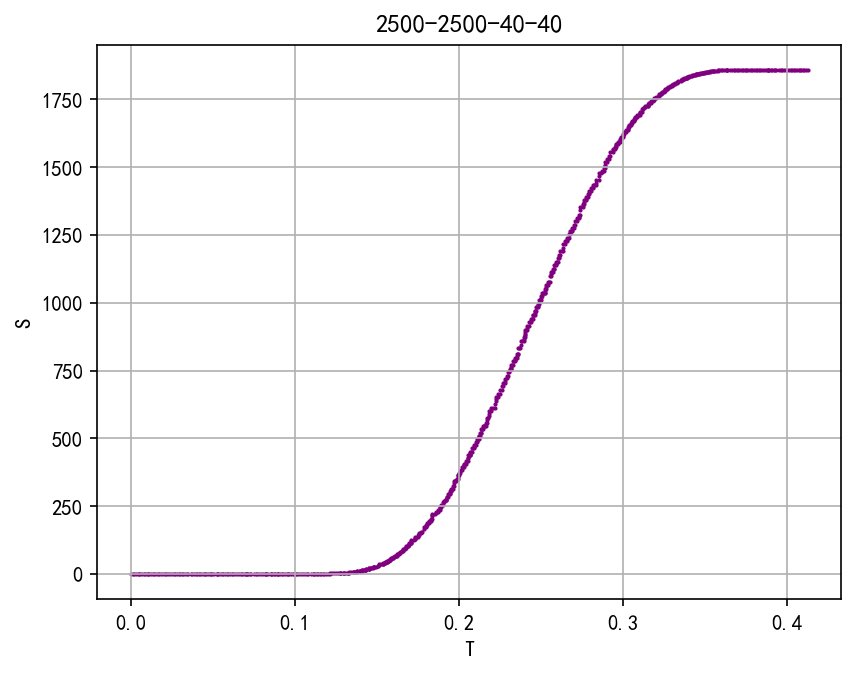

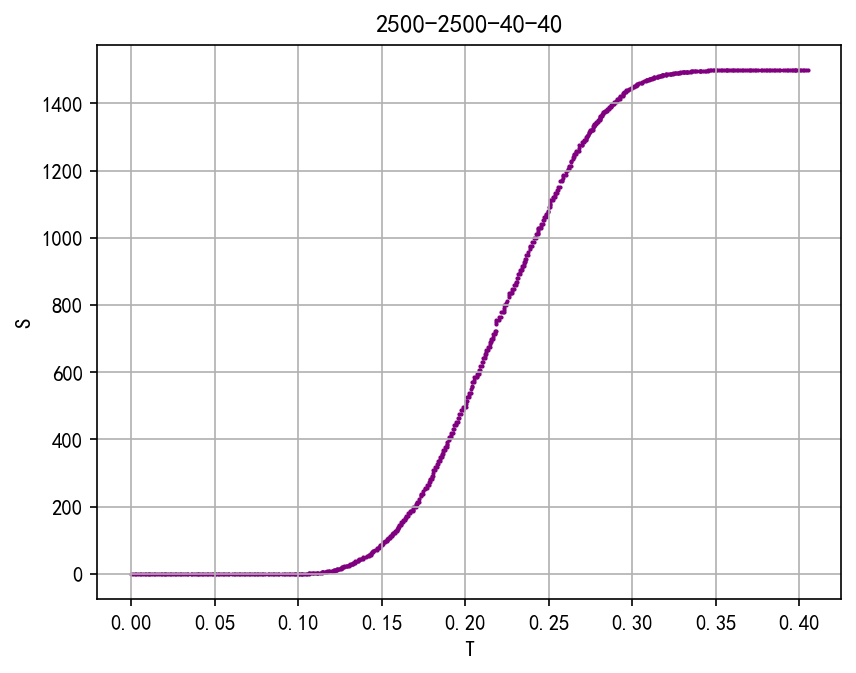

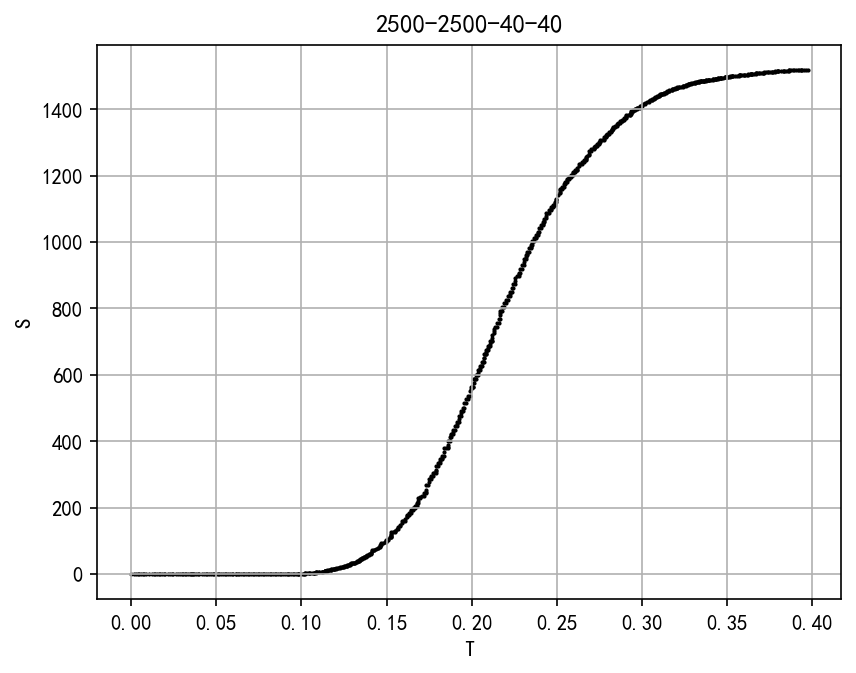

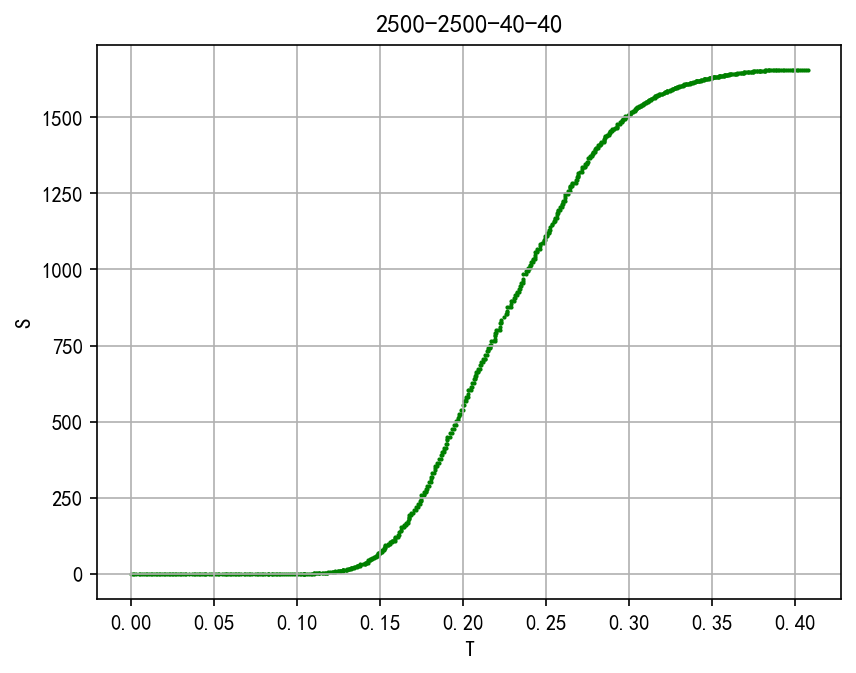

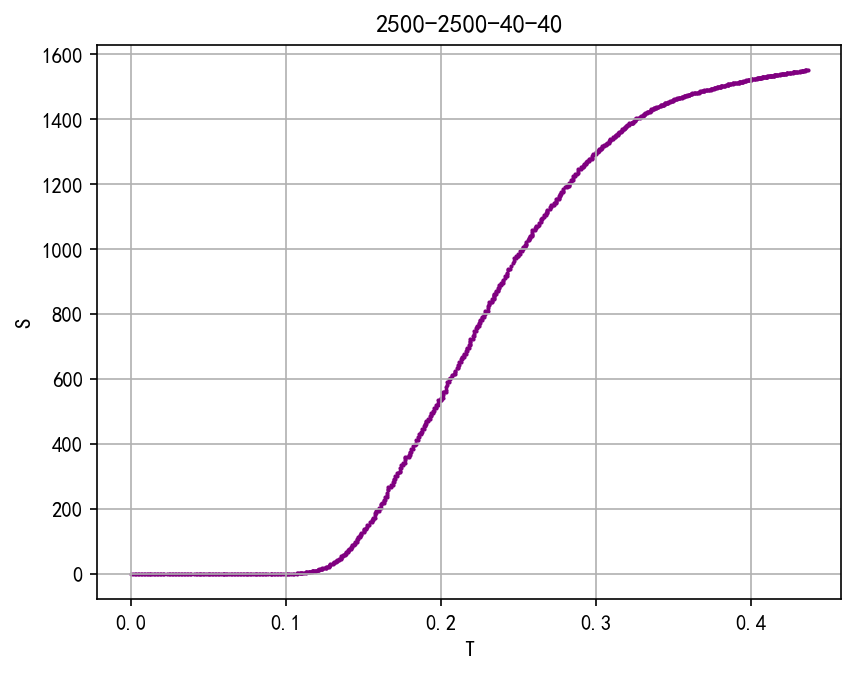

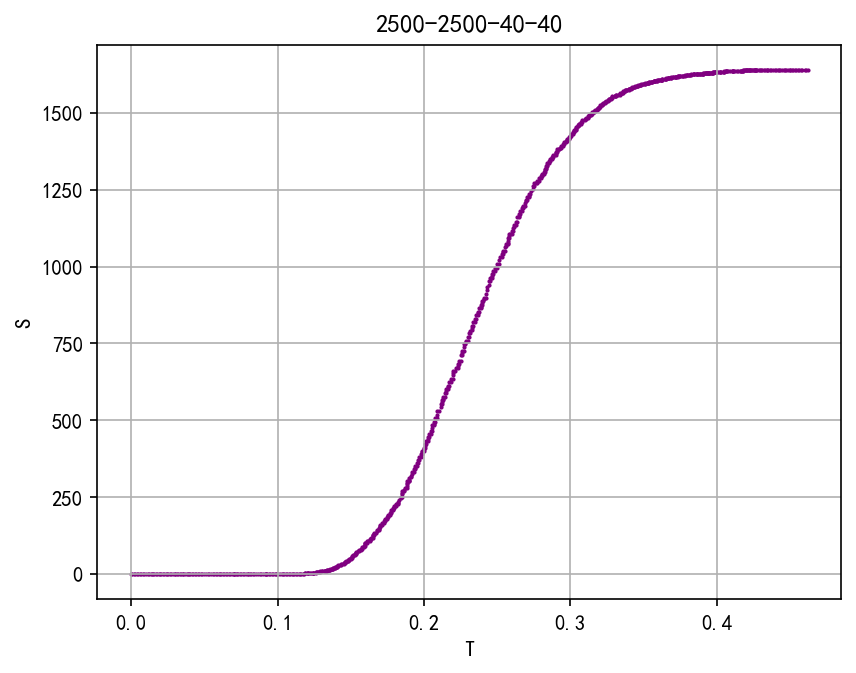

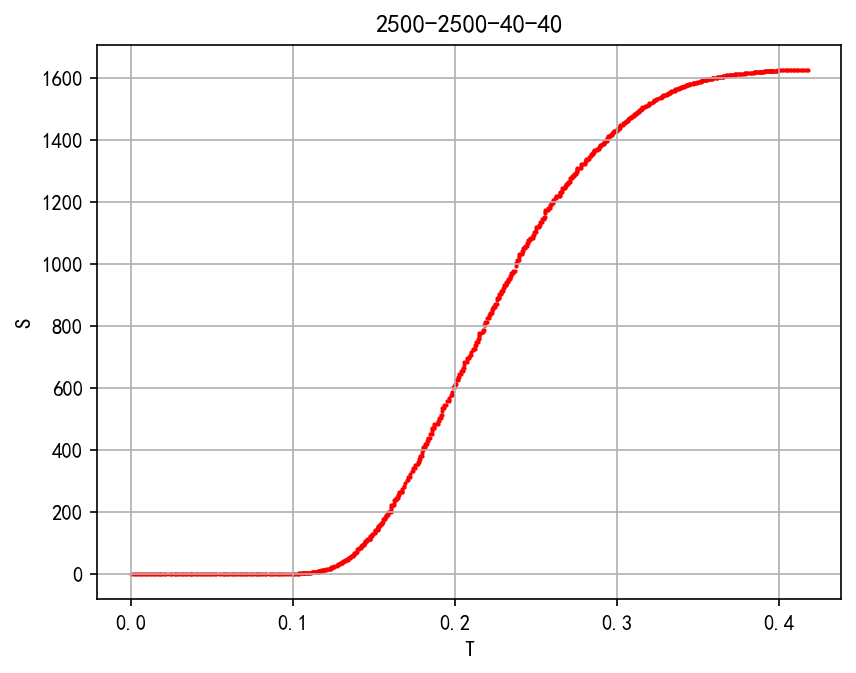

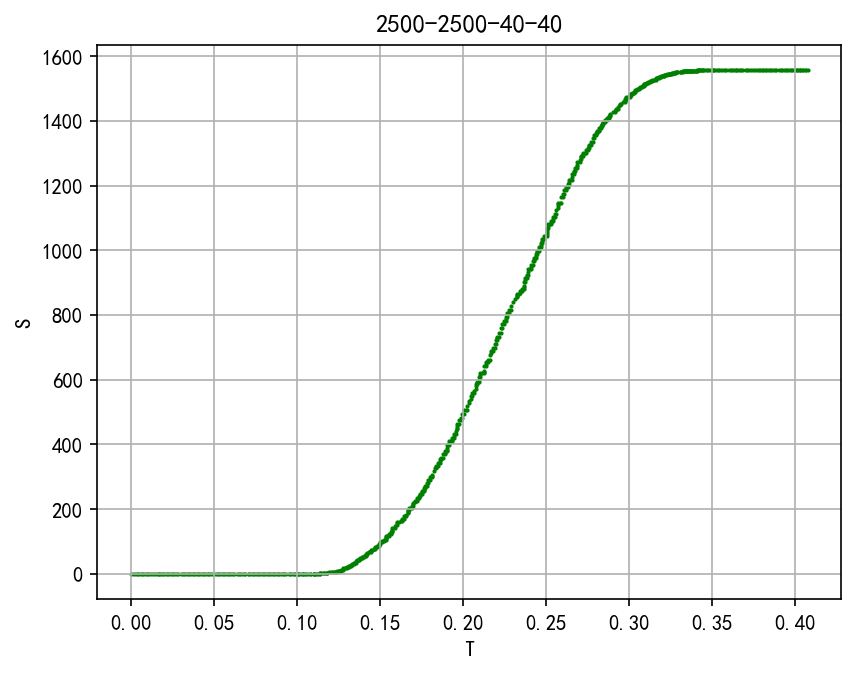

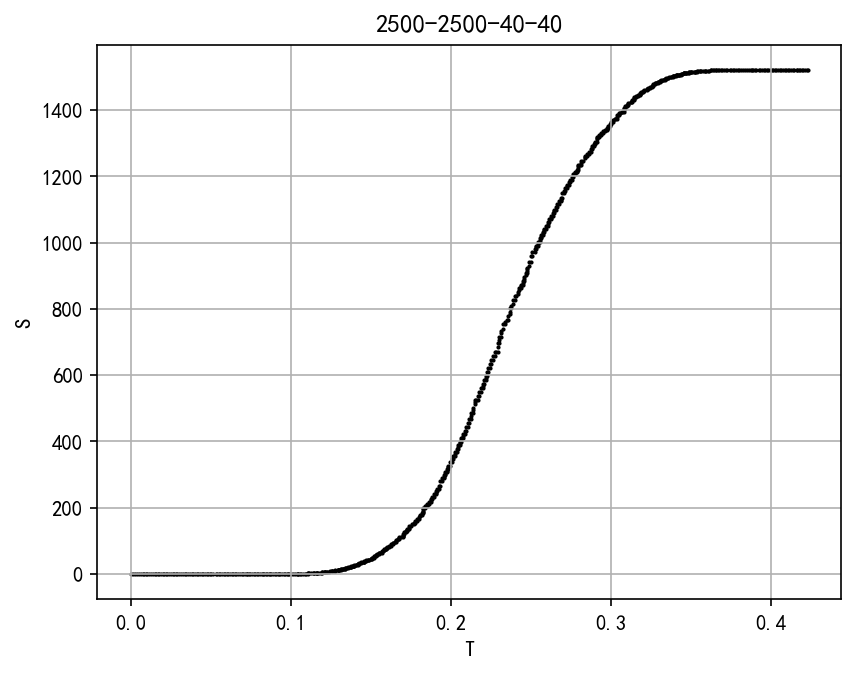

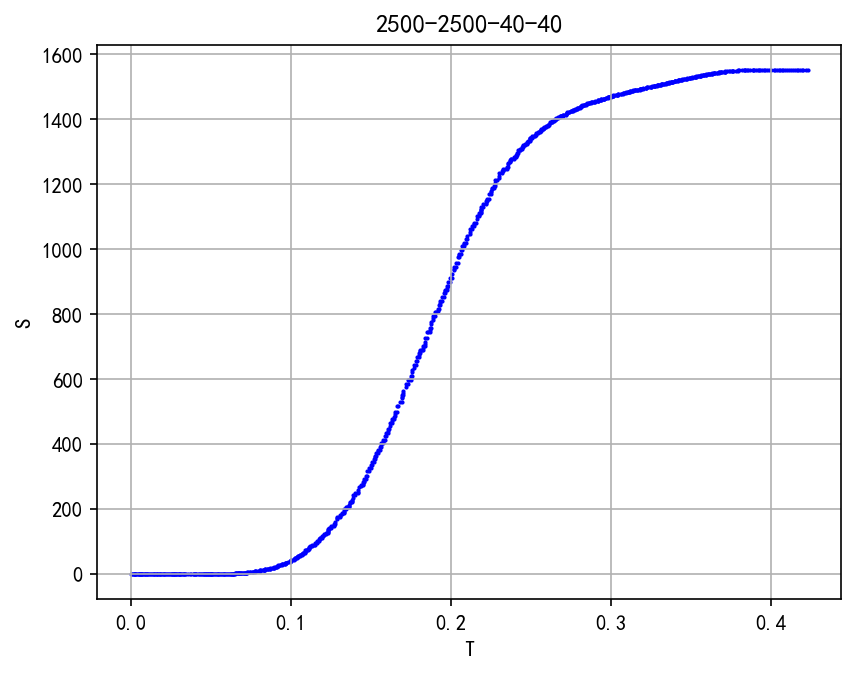

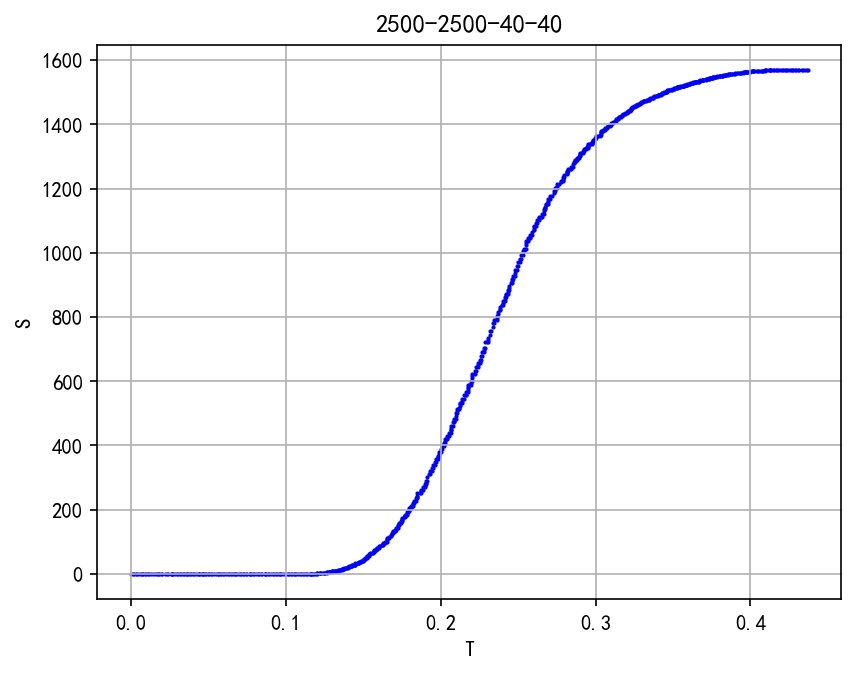

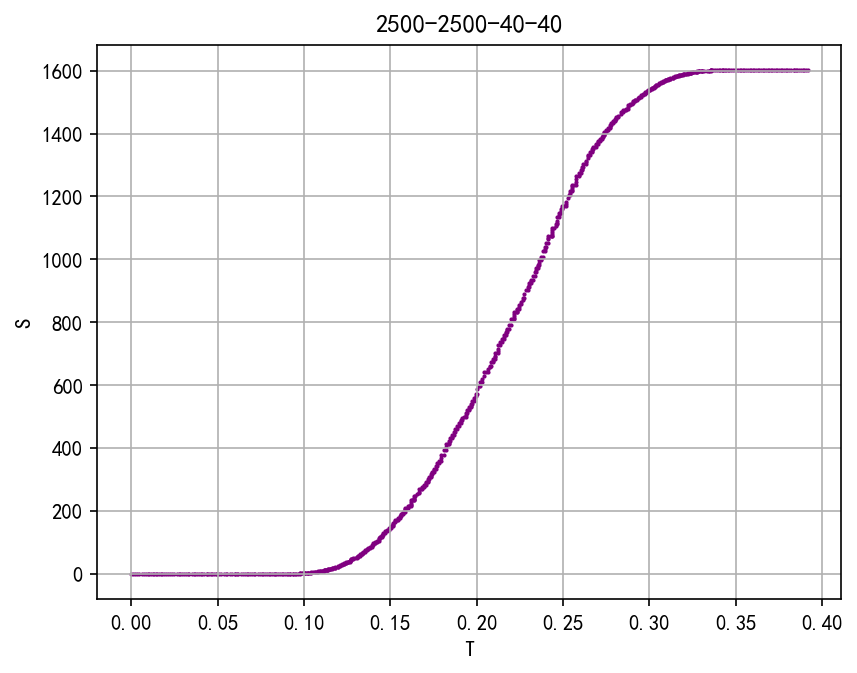

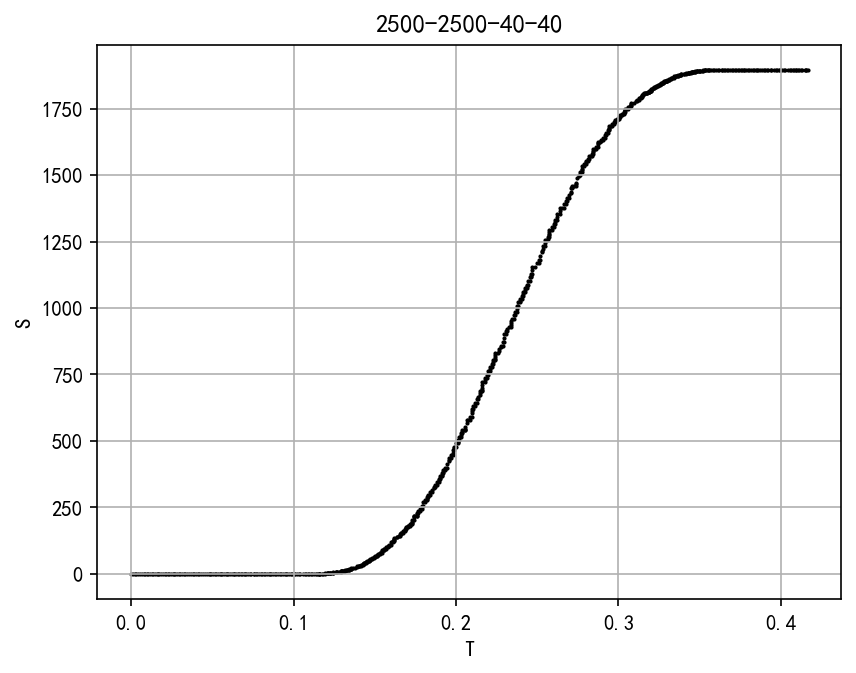

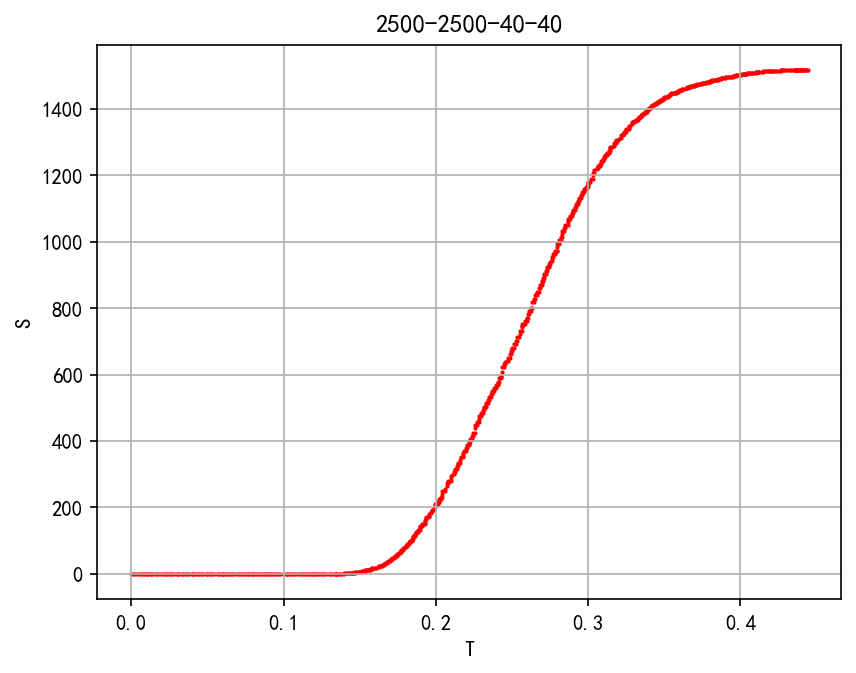

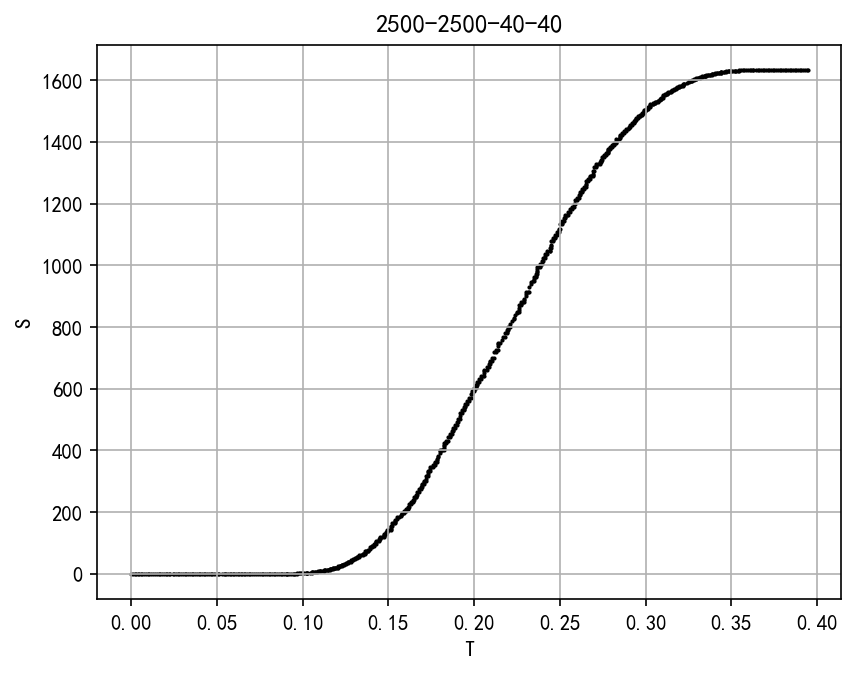

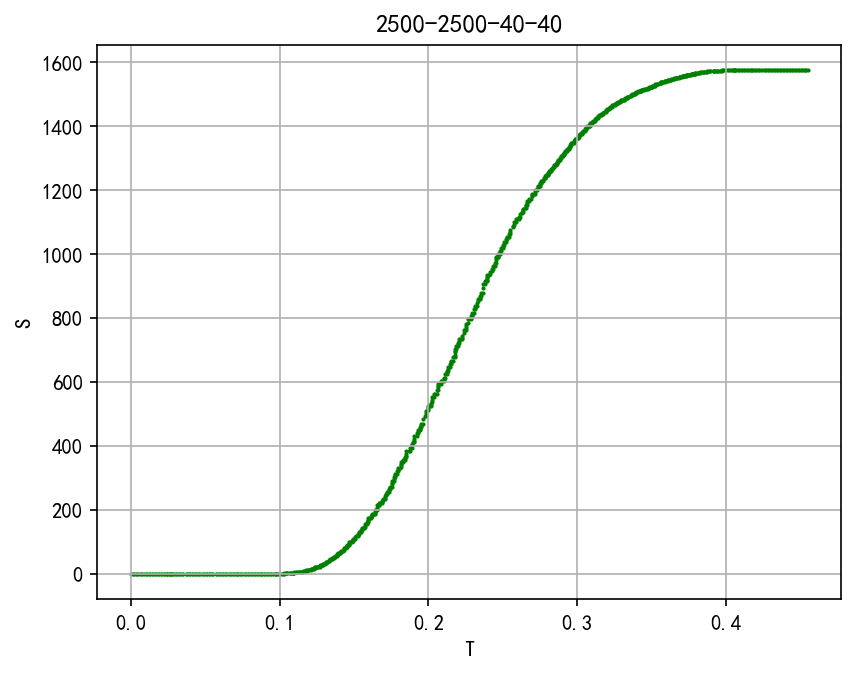

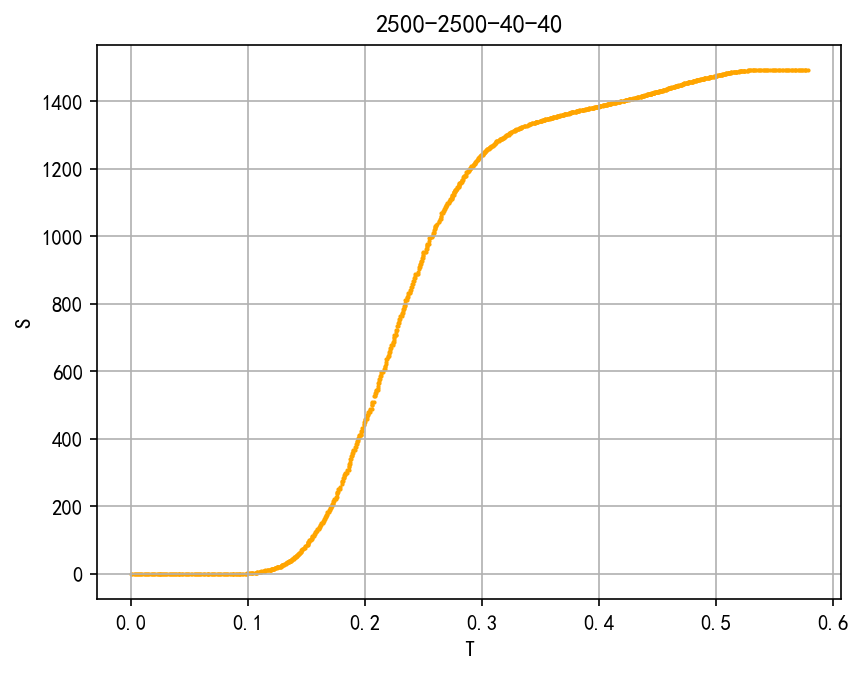

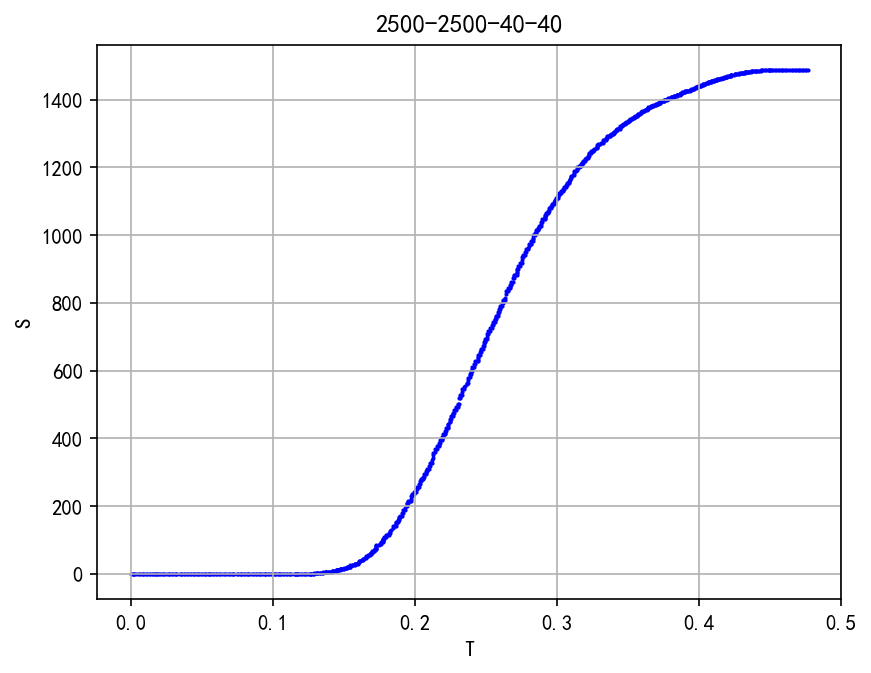

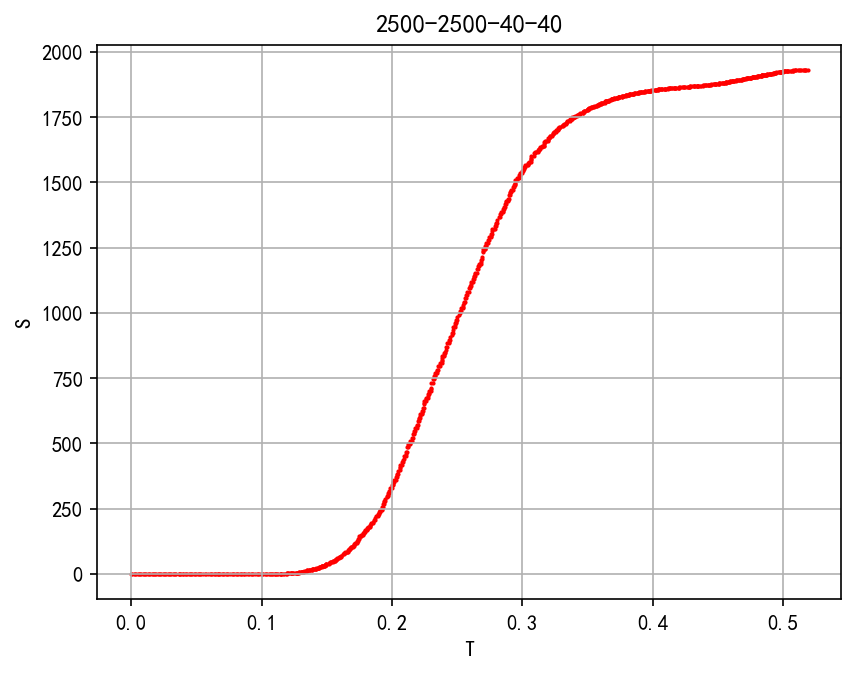

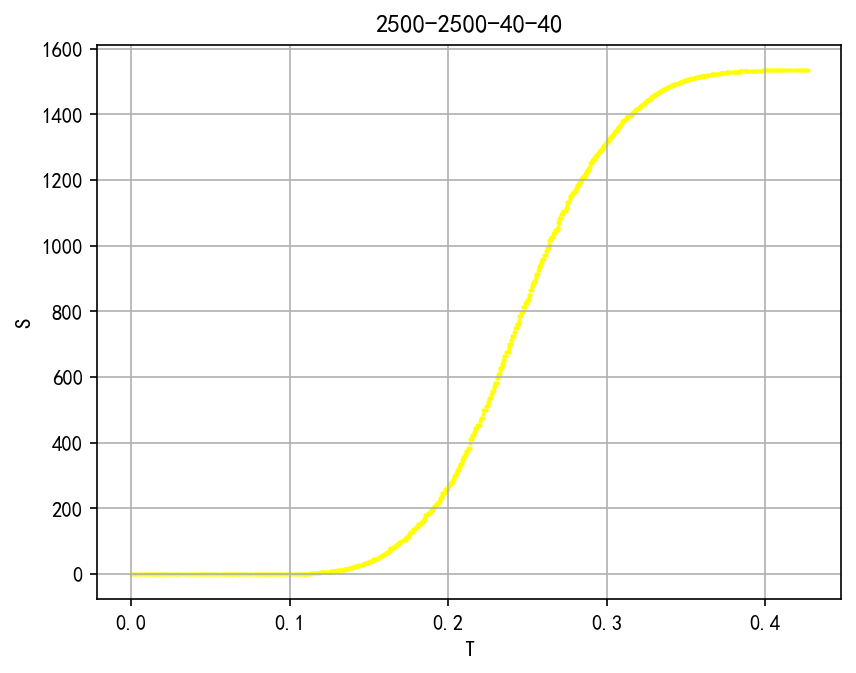

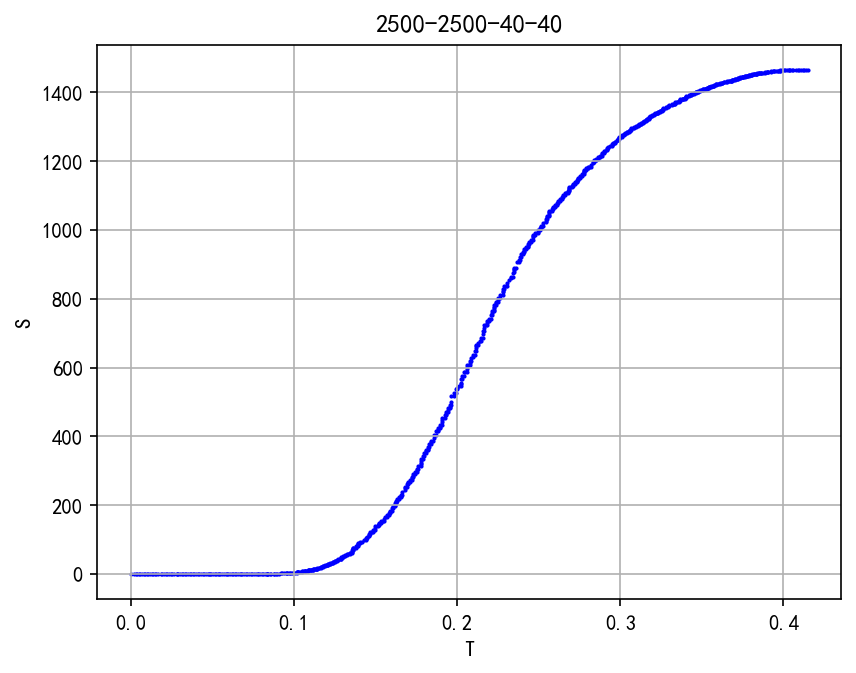

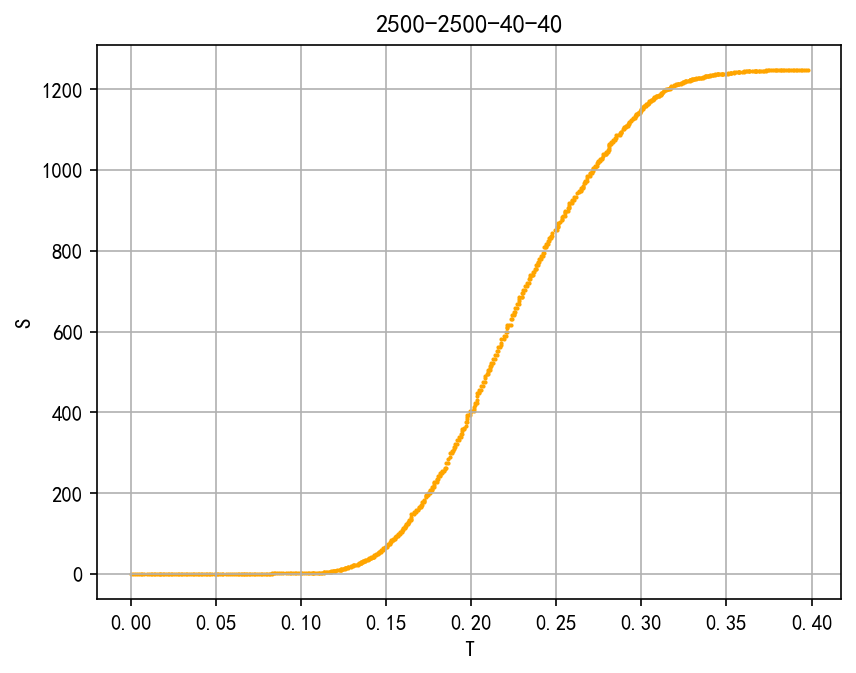

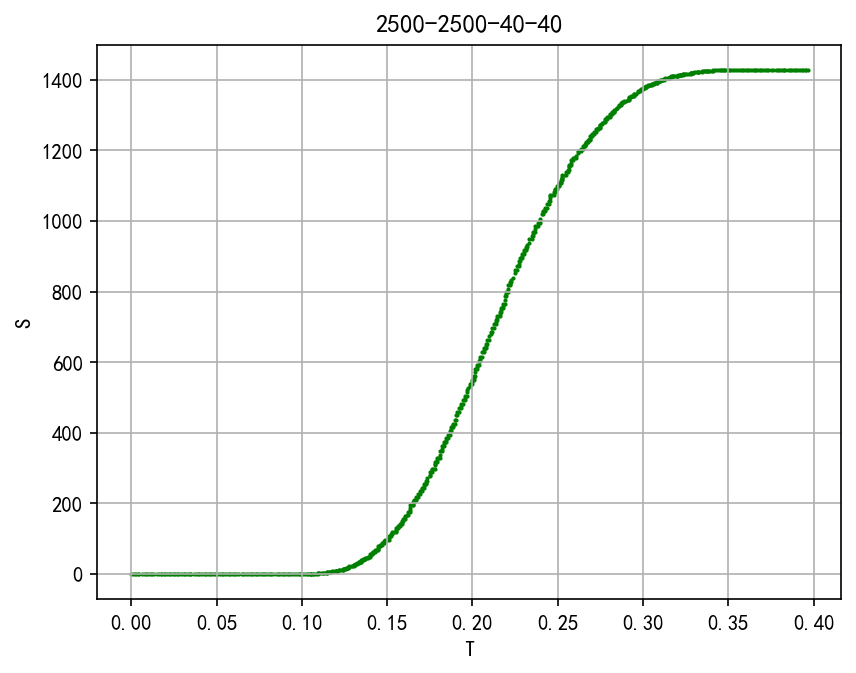

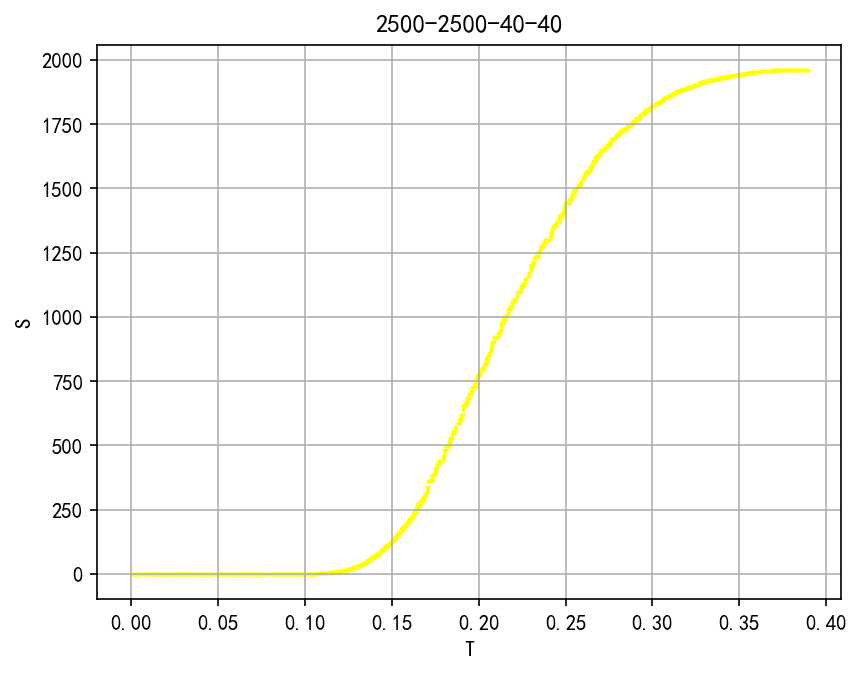

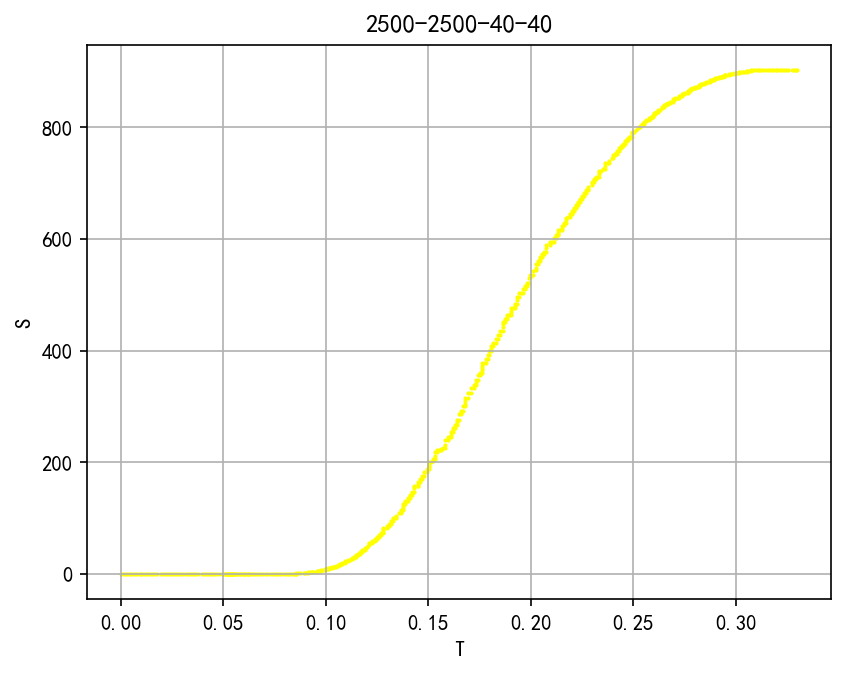

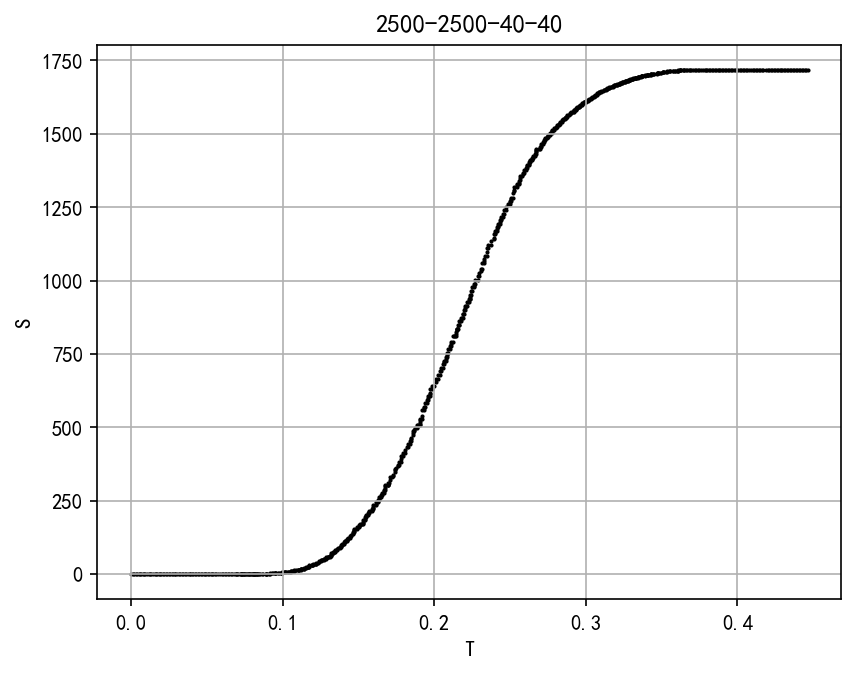

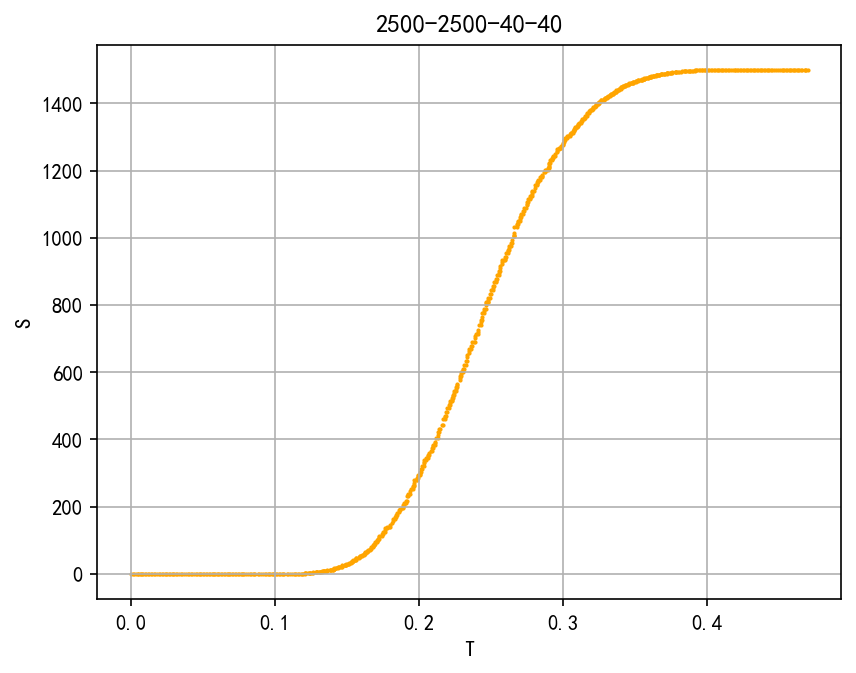

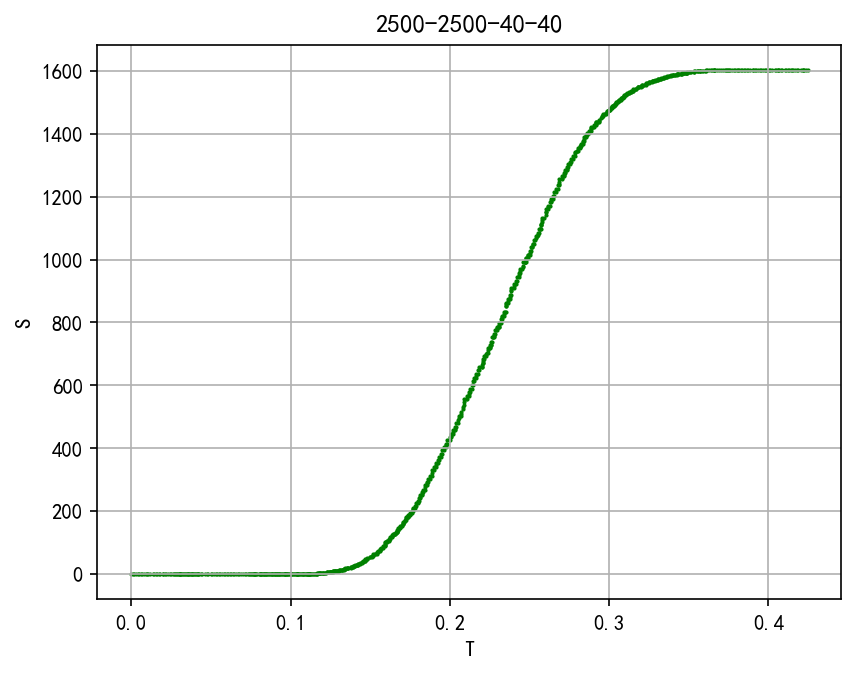

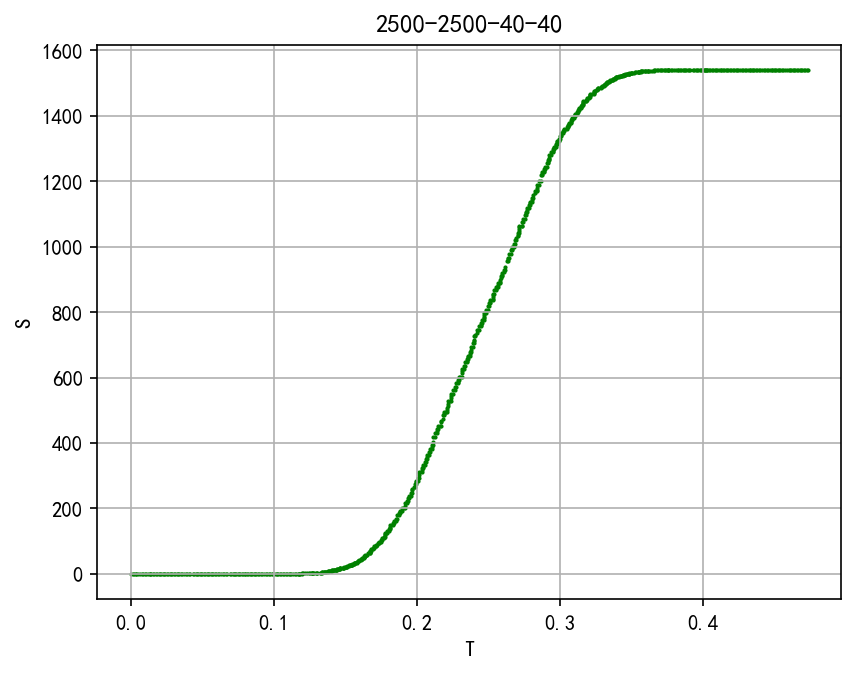

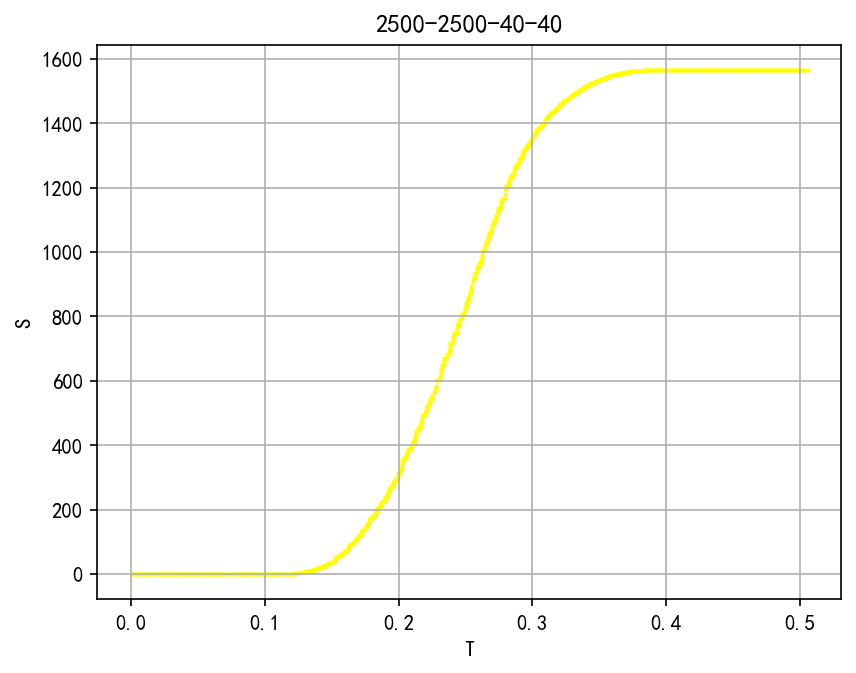

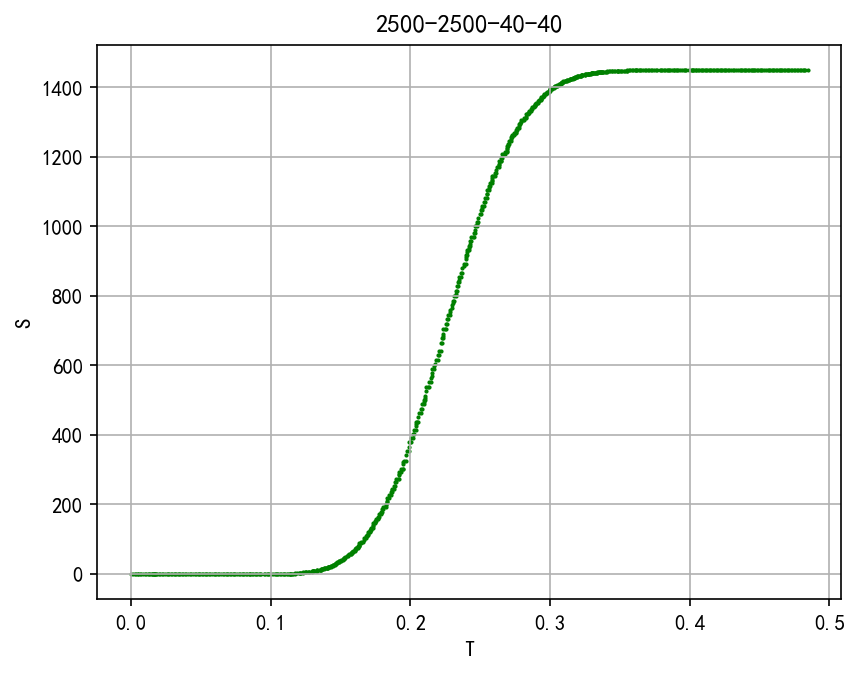

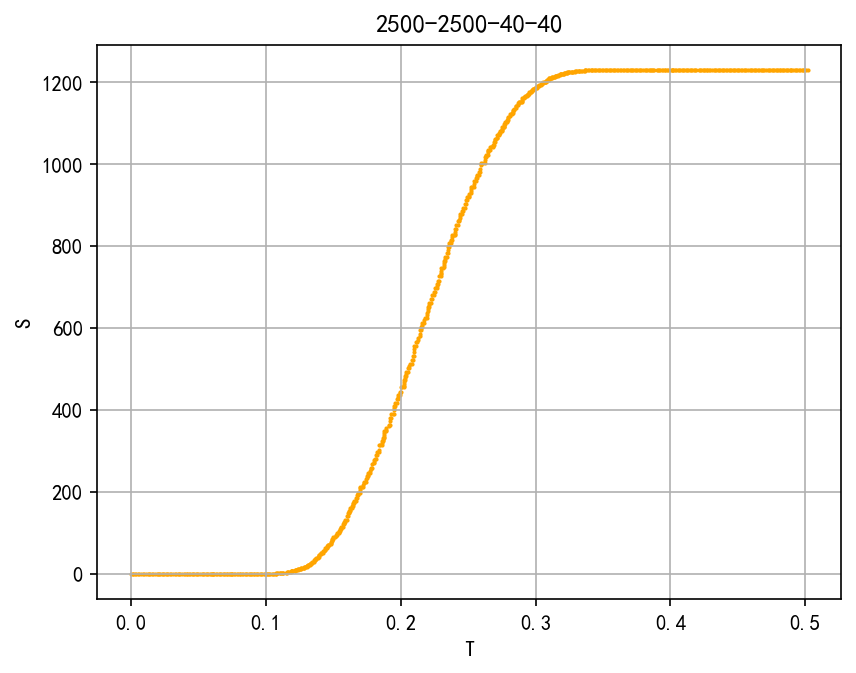

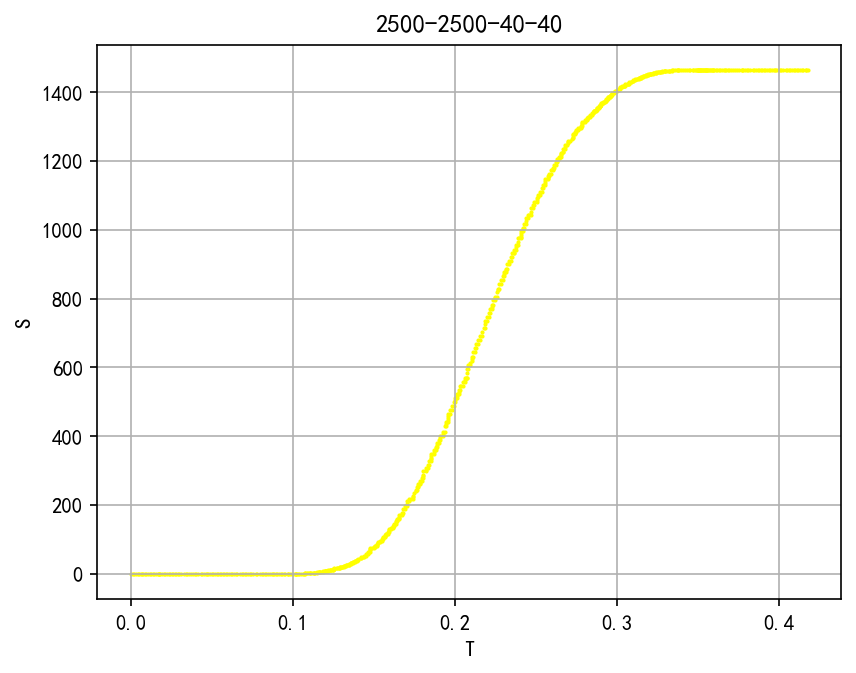

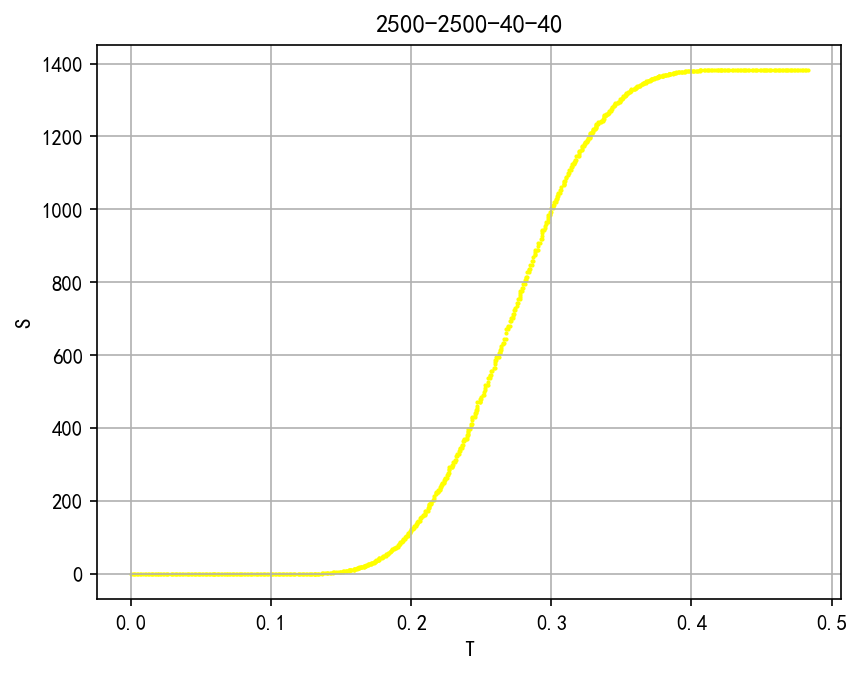

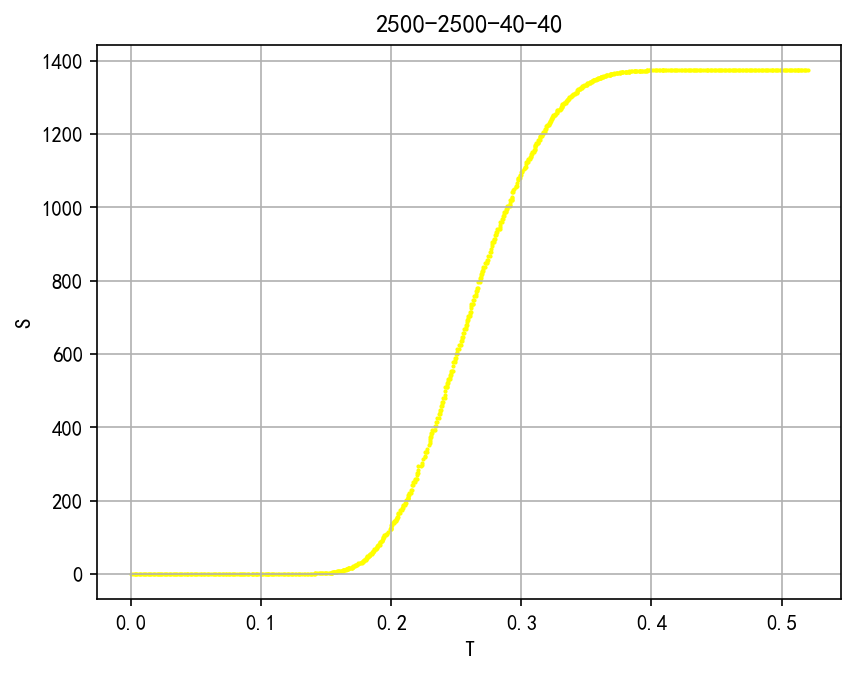

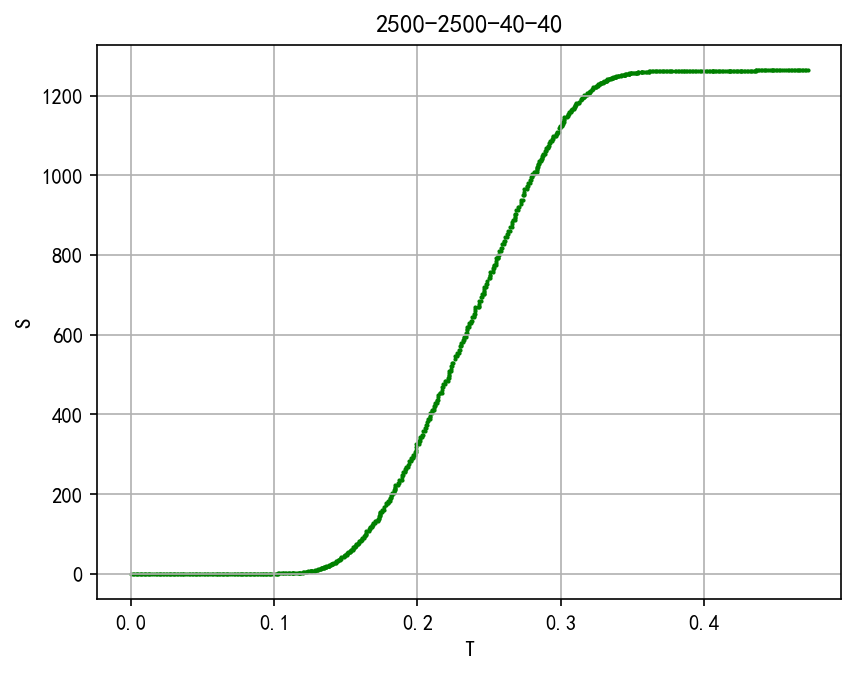

In [14]:
colors=[
    'red','orange','yellow','green','blue','purple','black',
]
#plt.figure(dpi=300)
for i in range(len(T)):
    plt.figure(dpi=150)
    plt.scatter(T[i],S[i], c=colors[random.randint(0,6)], label='L', s=1)
    #plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
    plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
    plt.xlabel('T')
    plt.ylabel('S')
    #plt.legend()
    plt.grid()
    plt.show()